# Train a Multi Layer Perceptron

This Notebook shows a simple example of solving a classification problem via a very simple neural network, a MLP with 1 hidden layer.

This example is intended to be a simple usecase for the HPO frameworks _not_ to provide good performances on the classifacation task.

## On RAVEN
Remember to load the desired modules (`pytorch`)

In [1]:
module("load", "pytorch/gpu-cuda-11.6/2.1.0")

Loading pytorch/gpu-cuda-11.6/2.1.0
  Loading requirement: cuda/11.6 cudnn/8.9.2


## Import libraries

In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim

from models import MLP
from utils import train_epoch, eval_model, get_FashionMNIST

In [3]:
import matplotlib.pyplot as plt
import time

## The Data

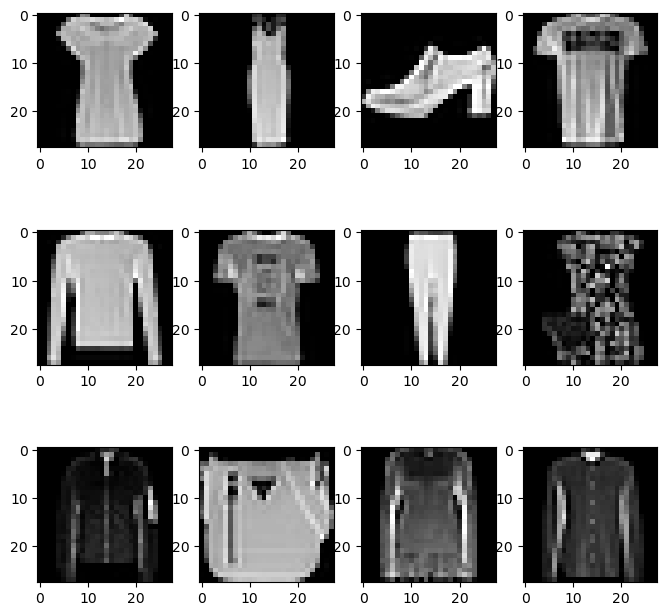

In [4]:
batch_size = 64

device = torch.device("cuda")
train_loader, valid_loader = get_FashionMNIST(batch_size=batch_size, device=device)

N=12
batch = next(iter(train_loader))[0]
figure = plt.figure(figsize=(8, 8))
for i in range(N):
    figure.add_subplot(N//4, 4, i+1)
    plt.imshow(batch[i,0], cmap="gray")

## The model

In [5]:
hidden = 128
model = MLP(hidden=hidden).to(device)
model

MLP(
  (dense1): Linear(in_features=784, out_features=128, bias=True)
  (logits): Linear(in_features=128, out_features=10, bias=True)
)

## Optimisation

In [6]:
lr = 0.001

loss = F.nll_loss
optimizer = optim.SGD(params=model.parameters(), lr=lr)

## Training loop

In [7]:
epochs = 10

start = time.time()
for epoch in range(1, epochs + 1):
    train_epoch(model, device, train_loader, optimizer, loss, epoch, verbose=True)
    _, valid_acc = eval_model(model, device, valid_loader, loss, verbose=True)

elapsed = time.time() - start
print(f"Done in in {elapsed:.1f}s - Final test accuracy: {valid_acc:.2f}")

Train Epoch: 1 [0/60000(0%)]	Loss: 2.284856
Train Epoch: 1 [6400/60000(11%)]	Loss: 2.235233
Train Epoch: 1 [12800/60000(21%)]	Loss: 2.200987
Train Epoch: 1 [19200/60000(32%)]	Loss: 2.120131
Train Epoch: 1 [25600/60000(43%)]	Loss: 2.100938
Train Epoch: 1 [32000/60000(53%)]	Loss: 2.105500
Train Epoch: 1 [38400/60000(64%)]	Loss: 2.011037
Train Epoch: 1 [44800/60000(75%)]	Loss: 1.968628
Train Epoch: 1 [51200/60000(85%)]	Loss: 1.900421
Train Epoch: 1 [57600/60000(96%)]	Loss: 1.893979

Test set: Average loss: 1.8615,Accuracy: 5438/10000(54.4%)

Train Epoch: 2 [0/60000(0%)]	Loss: 1.891516
Train Epoch: 2 [6400/60000(11%)]	Loss: 1.756443
Train Epoch: 2 [12800/60000(21%)]	Loss: 1.728676
Train Epoch: 2 [19200/60000(32%)]	Loss: 1.695045
Train Epoch: 2 [25600/60000(43%)]	Loss: 1.793964
Train Epoch: 2 [32000/60000(53%)]	Loss: 1.691396
Train Epoch: 2 [38400/60000(64%)]	Loss: 1.504166
Train Epoch: 2 [44800/60000(75%)]	Loss: 1.602319
Train Epoch: 2 [51200/60000(85%)]	Loss: 1.577167
Train Epoch: 2 [5760

## Putting all together:

In [8]:
def train_fn(hidden=128, lr=0.001, batch_size=64, epochs=10, device=torch.device("cuda")):
    train_loader, valid_loader = get_FashionMNIST(batch_size=batch_size, device=device)
    model = MLP(hidden=hidden).to(device)
    optimizer = optim.SGD(params=model.parameters(), lr=lr)
    loss = F.nll_loss
    
    start = time.time()
    for epoch in range(1, epochs + 1):
        train_epoch(model, device, train_loader, optimizer, loss, epoch, verbose=False)
    _, acc = eval_model(model, device, valid_loader, loss, verbose=False)
    elapsed = time.time() - start
    return elapsed, acc

## Manually check `hidden`

In [9]:
print(f"hidden\ttime(s)\taccuracy(%)")
for hidden in [64, 128, 256, 512]:
    elapsed, acc = train_fn(hidden=hidden)
    print(f"{hidden}\t{elapsed:.1f}\t{acc:.2f}")

hidden	time(s)	accuracy(%)
64	13.0	72.32
128	13.1	73.31
256	13.1	73.61
512	13.0	74.26


## Manually check `lr`

In [10]:
print(f"lr\ttime(s)\taccuracy(%)")
for lr in [1e-04, 0.001, 0.01, 0.1, 1]:
    elapsed, acc = train_fn(lr=lr)
    print(f"{lr}\t{elapsed:.1f}\t{acc:.2f}")

lr	time(s)	accuracy(%)
0.0001	13.0	60.71
0.001	13.0	73.39
0.01	13.1	83.61
0.1	13.0	87.99
1	13.1	10.00
